# <b>Classification Model</b> using <b>Wine Dataset</b>


The features include:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline
- target

In [9]:
# Basic libraries
import numpy as np 
import pandas as pd 

# Visualization libraries
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load dataset
from sklearn.datasets import load_wine

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Display the first five rows of the dataset
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Check shape
wine_df.shape

(178, 14)

In [ ]:
# Check columns
wine_df.columns.tolist()

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [6]:
# Check for irregularities
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

- No missing values

In [ ]:
# Check the statistics of the dataset
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


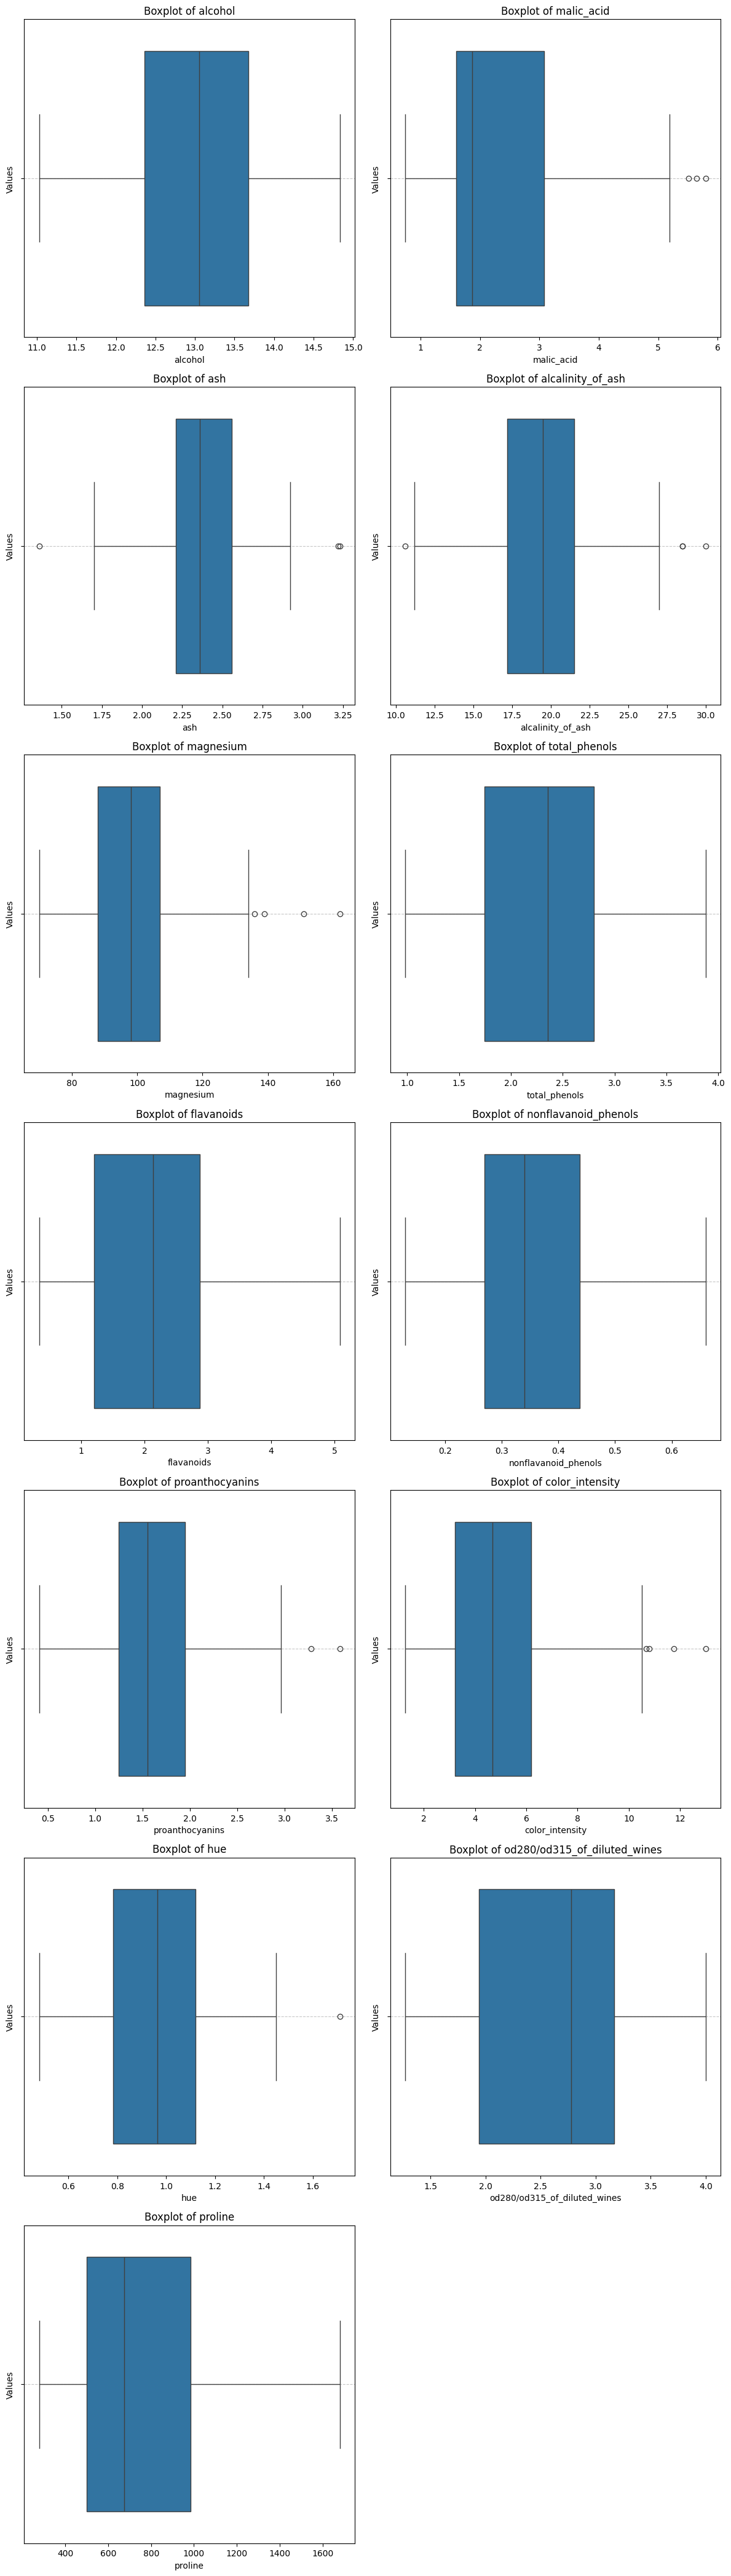

In [ ]:
# Check for outiers in the features
features = wine_df.columns[:-1] # Exclude the target variable
num_features = len(features)

# Set up the grid layout for two columns
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(12, 6 * ((num_features + 1) // 2)))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=wine_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show();

- Presence of outliers in `malic_acid`, `ash`, `alcalinity_of_ash`, `magnesium`, `proanthocyanins`, `color_intensity`, and `hue` features.

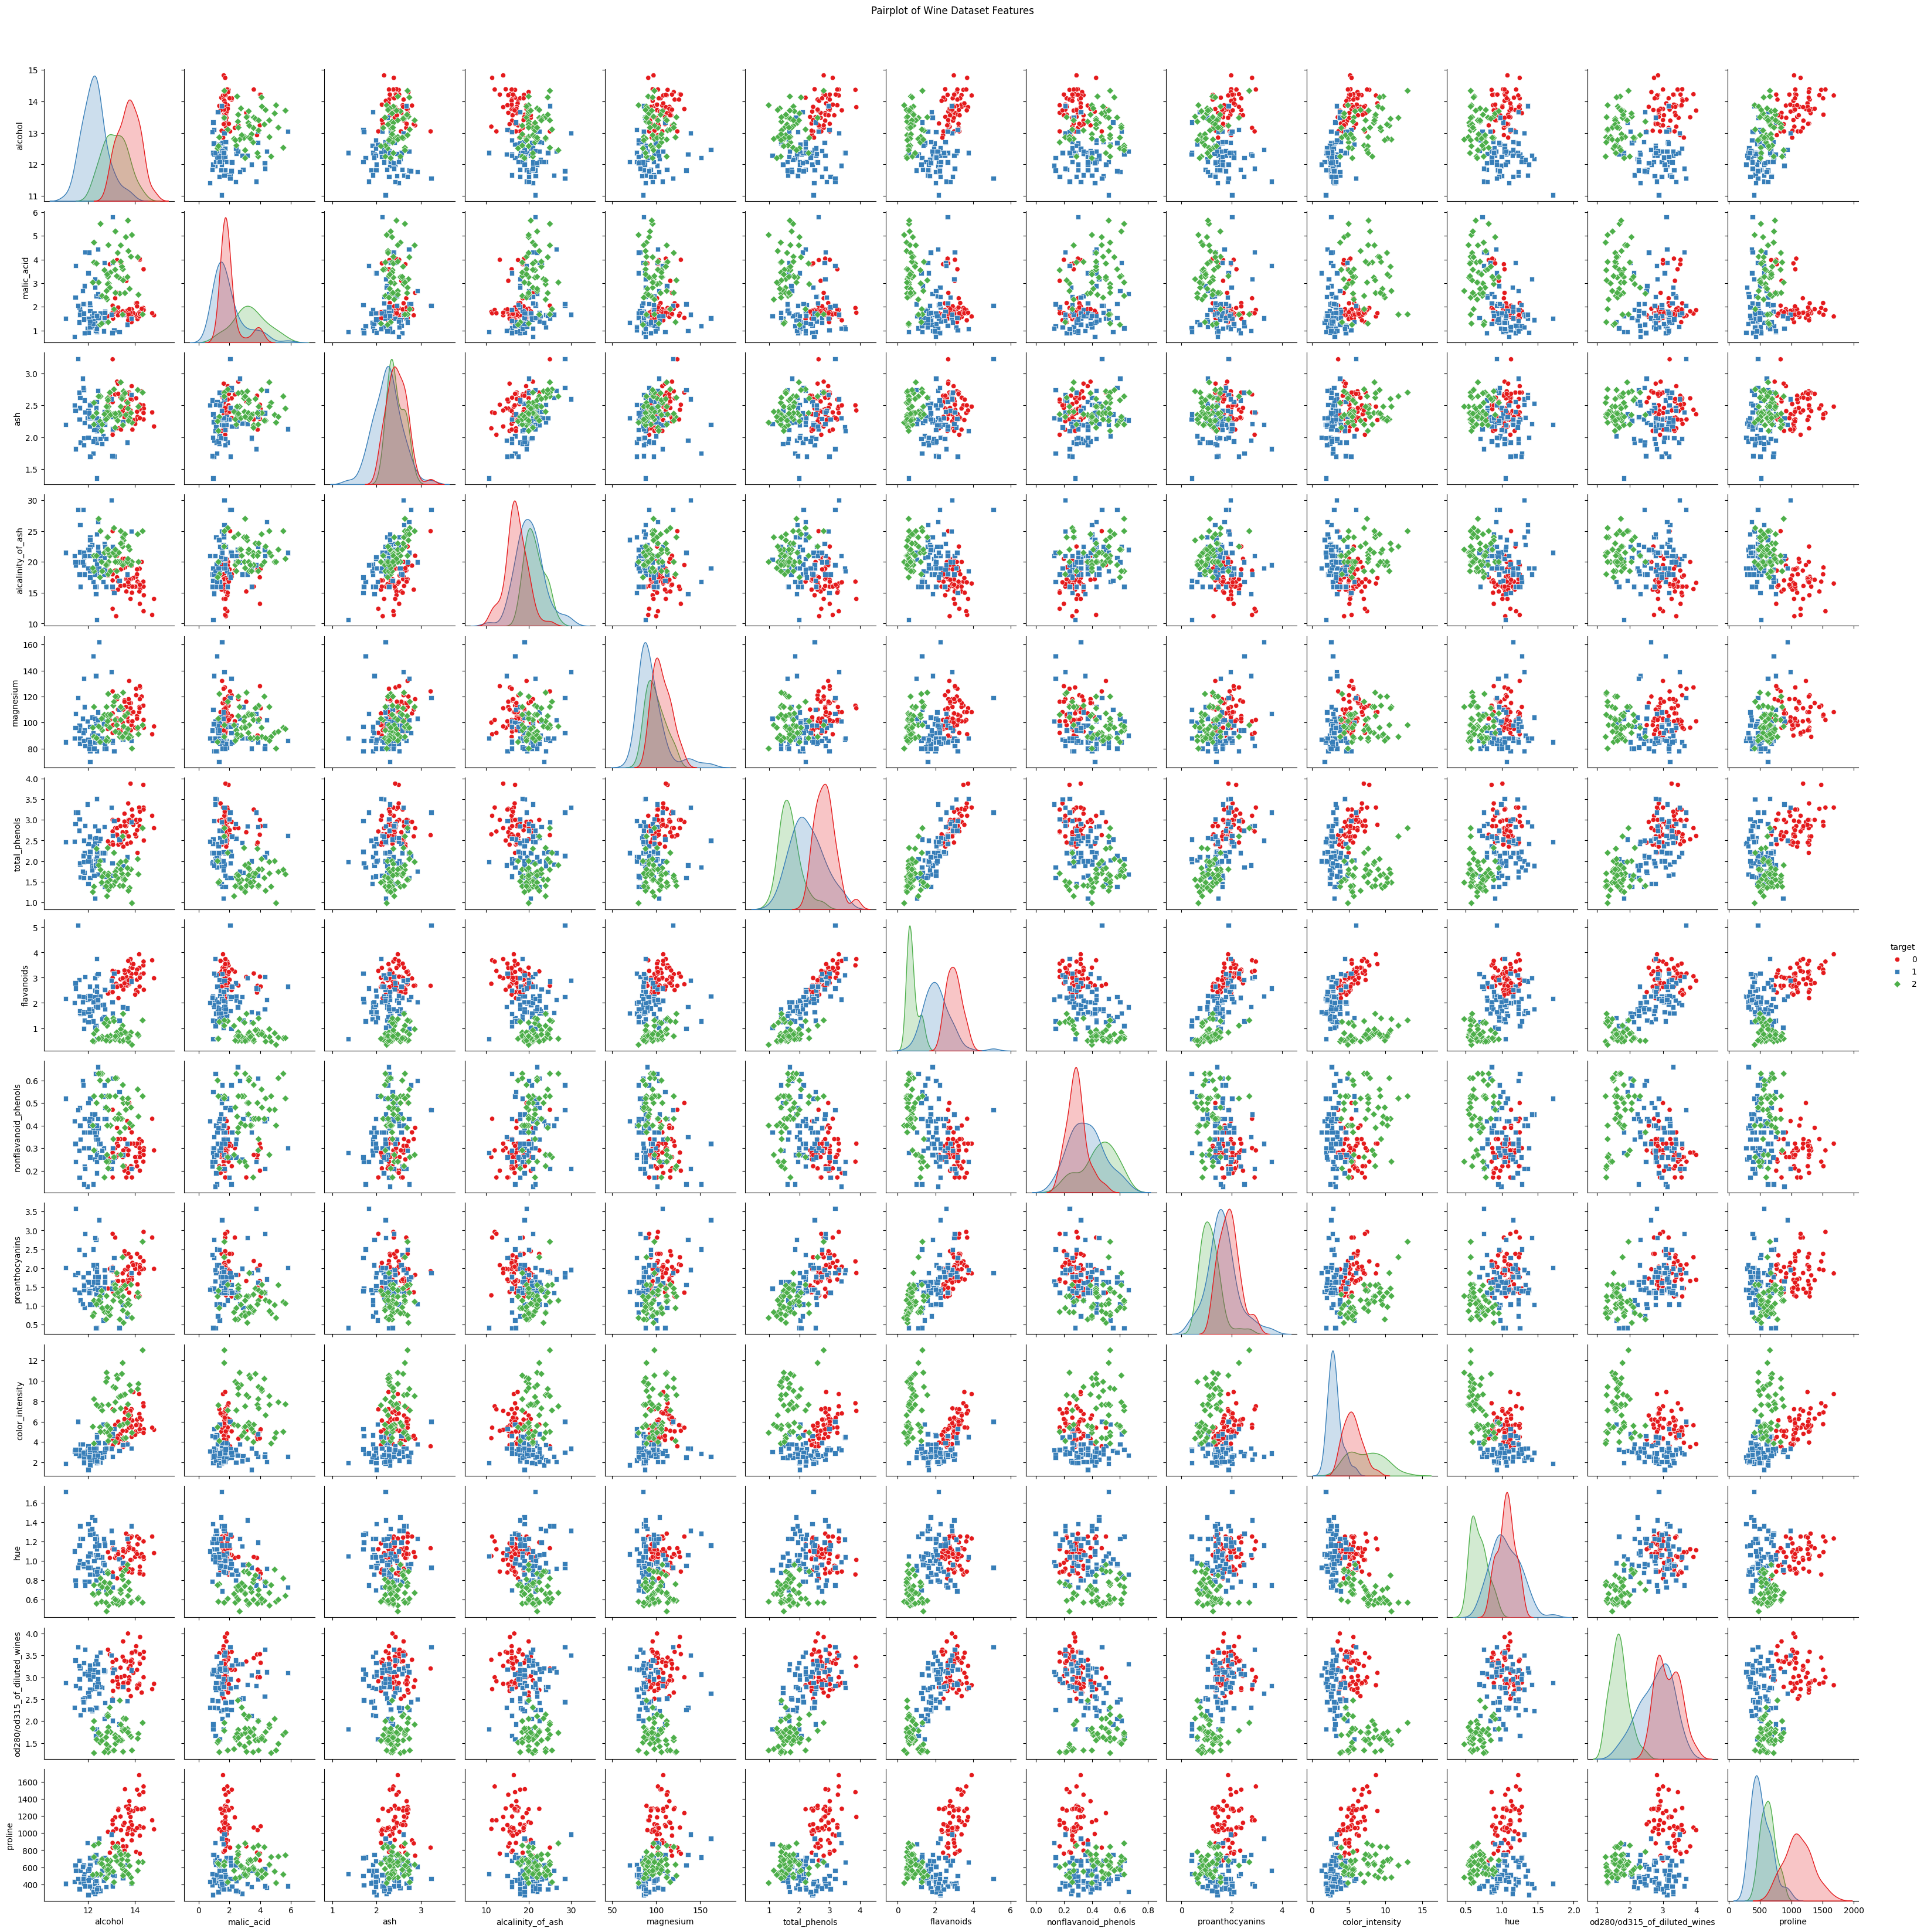

In [56]:
# Pairplot to visualize the distribution of features
sns.pairplot(wine_df, hue='target', palette='Set1', markers=["o", "s", "D"], height=2.5)
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show();

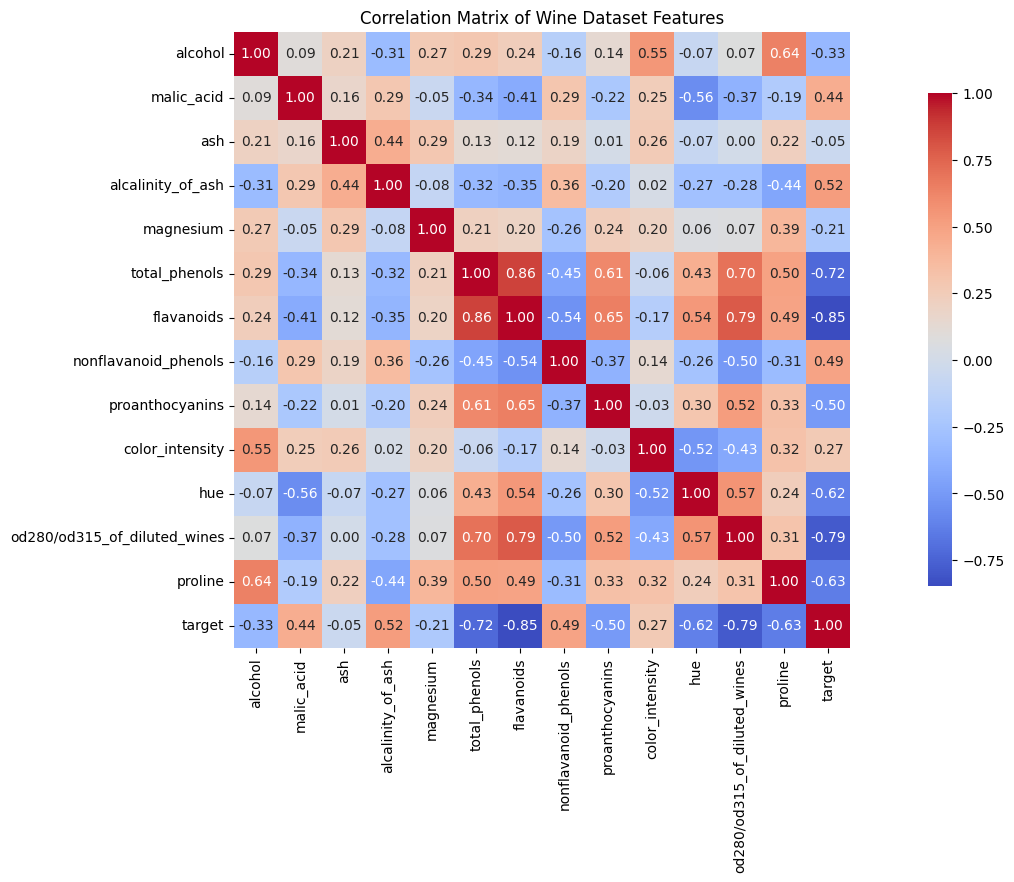

In [57]:
# Heatmap for correlation matrix
plt.figure(figsize=(20, 8))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show();

In [20]:
# feature = wine_df.columns
# # Check for outliers
# plt.figure(figsize=(12, 8))
# # sns.boxplot(data=wine_df, x=feature, y='target', palette='Set3')
# # plt.title(f'Boxplot of "{feature}"')
# # plt.xticks(rotation=90)
# # plt.xlabel(feature)
# # plt.ylabel('Values')
# # plt.show();

# for feature in wine_df.columns[:-1]:  # Exclude 'target' column
# 	sns.boxplot(data=wine_df, x='target', y=feature)
# 	plt.title(f'Boxplot of "{feature}"')
# 	plt.xlabel('Target')
# 	plt.ylabel(feature)
# 	plt.show();


## Split the dataset into train and test

In [27]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation

Classifier: Logistic Regression
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


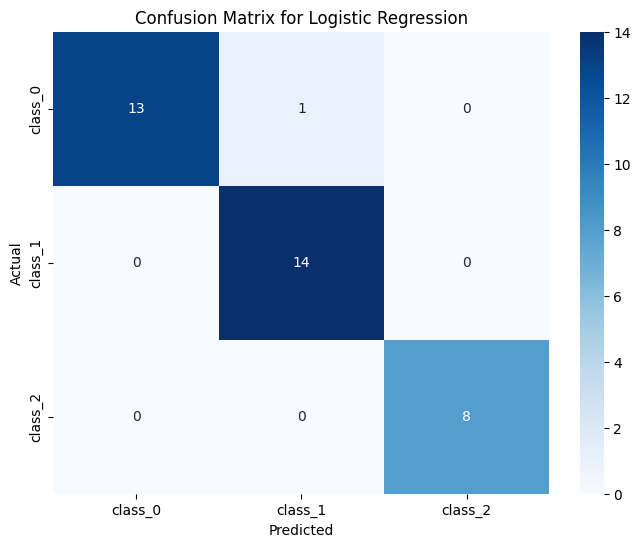



Classifier: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


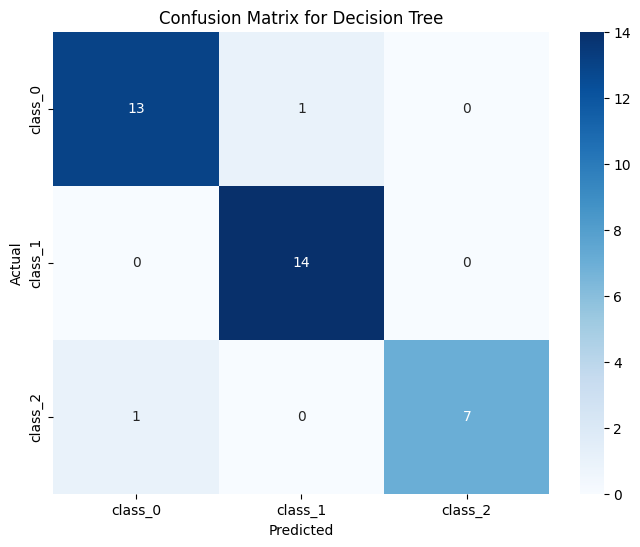



Classifier: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


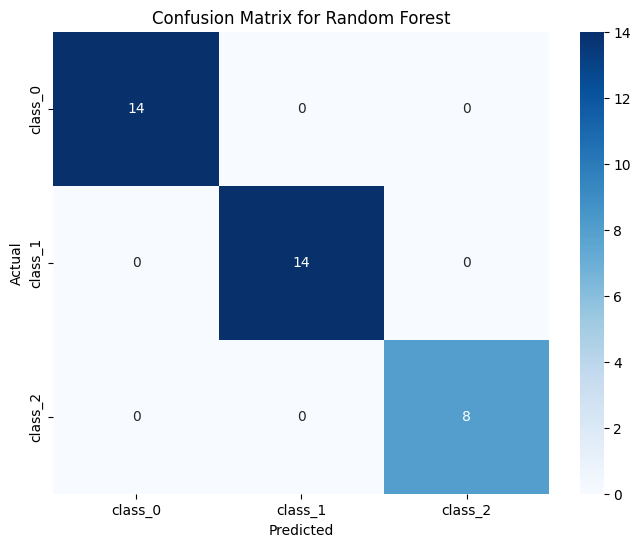



Classifier: K-Nearest Neighbors
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Confusion Matrix:
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


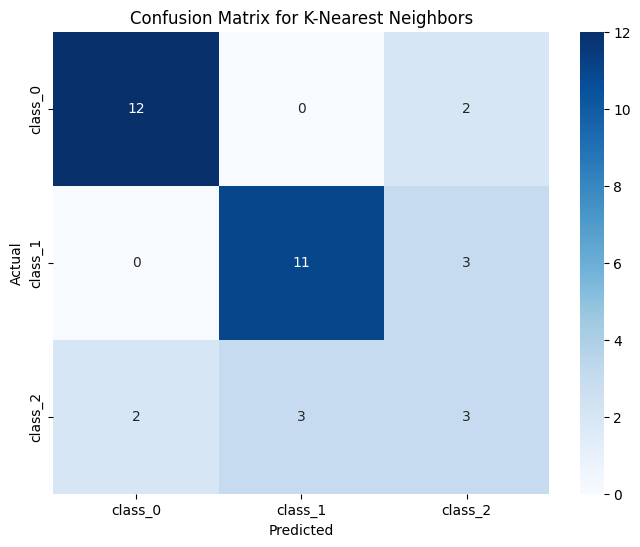



Classifier: Naive Bayes
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


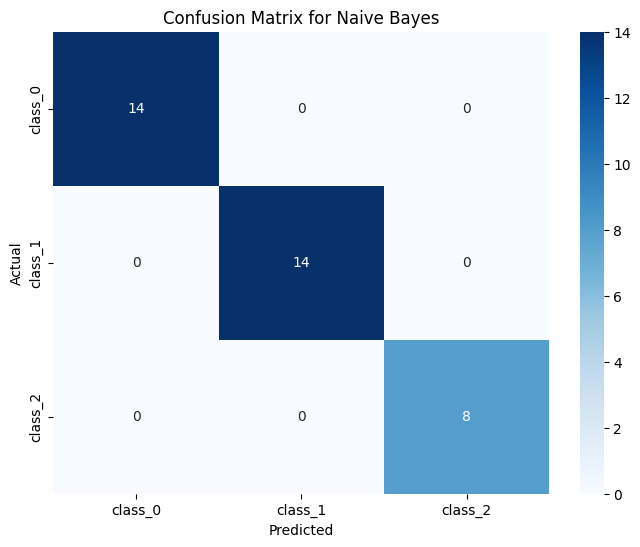



Classifier: Support Vector Machine
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

Confusion Matrix:
[[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


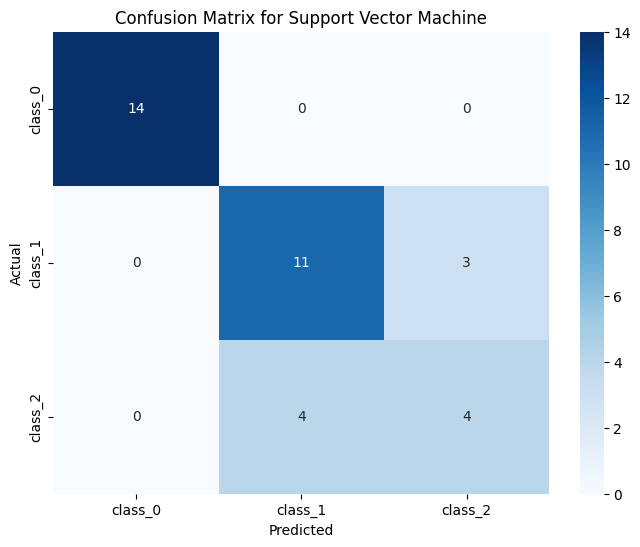

In [ ]:
# Train and evaluate different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
# Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    conf_matrix = result['confusion_matrix']
    # Visualize confusion matrix for each classifier
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show();
    
    print("\n" + "="*50 + "\n")


## Conclusion

The dataset was evaluated using the following models: `Logistic Regression`, `Decision Tree`, `Random Forest`, `K-Nearest Neighbors`, `Naive Bayes`, and `Support Vector Machine`.
On `accuracy` metric:
- `Random Forest` and `Naive Bayes` were the best performing models having scored `1.00`
- `Logistic Regression` scored `0.97` 
- `Decision Tree` score `0.94`
- `Support Vector Machine`, `0.81` and
- `K-Nearest Neighbors`, `0.72`



In [ ]:
# # DataFrame to store results
# results = pd.DataFrame(columns=['Model', 'Accuracy'])

# # Helper function for confusion matrix plotting
# def plot_conf_matrix(y_true, y_pred, title):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(5, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Confusion Matrix: {title}')
#     plt.show();

In [41]:
# ## 1. Logistic Regression
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)
# print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
# plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
# results.loc[len(results)] = ['Logistic Regression', accuracy_score(y_test, y_pred_lr)]